# Assessment 2 - Comprehensive Analysis on Carbon Dioxide Levels and Climate Change

## Import Modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Dataset
Dataset yang digunakan untuk assessment ini adalah data [Carbon Dioxide Levels](https://climate.nasa.gov/vital-signs/carbon-dioxide/) yang diperoleh dari NASA's Climate Change Data Portal. Dataset ini mencakup informasi terkait tahun, tingkat CO2, dan variabel-variabel iklim lainnya yang relevan. Terdapat 8 kolom, yaitu:
1. **Year** : Tahun dilakukannya pengukuran CO2.
2. **Month** : Bulan dilakukannya pengukuran CO2.
3. **Decimal Date** : Format desimal yang mencakup tahun dan bulan dalam format desimal. "1958.2027" merepresentasikan bahwa data berasal dari bulan Maret tahun 1958.
4. **Monthly Average** : Nilai rata-rata bulanan dari tingkat CO2 dalam satuan ppm.
5. **De-seasonalized** : Nilai tingkat CO2 yang telah di-dekstrimasi atau disesuaikan untuk menghilangkan perubahan yang dipengaruhi oleh musim atau bulan tertentu. Ini membantu kita melihat perubahan CO2 yang lebih umum dan tidak dipengaruhi oleh fluktuasi musiman.
6. **#days** : Jumlah hari dalam bulan yang terkait dengan data. Nilai -1 biasanya mengindikasikan bahwa data tersebut tidak tersedia atau hilang. Dalam hal ini, nilai "-1" mungkin mengindikasikan bahwa ada ketidakpastian atau kehilangan data pada kolom tersebut.
7. **St. Dev of Days** :  Nilai standar deviasi dari data untuk bulan tersebut.
8. **Unc. of Mon Mean** : Ketidakpastian dari nilai rata-rata bulanan untuk bulan tersebut.

In [ ]:
# Membaca dataset CO2 Levels dari NASA's Climate Change Data Portal
url = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt"

# Membaca dataset ke dalam Pandas DataFrame dengan nama kolom yang telah diberikan
df = pd.read_csv(url, delim_whitespace=True, comment='#', header=None, names=["Year", "Month", "Decimal Date", "Monthly Average", "De-seasonalized", "#days", "St. Dev of Days", "Unc. of Mon Mean"])

# Menampilkan 5 data teratas dan 5 data terbawah dari dataset
print(df.head())
print(df.tail())


   Year  Month  Decimal Date  Monthly Average  De-seasonalized  #days  \
0  1958      3     1958.2027           315.70           314.43     -1   
1  1958      4     1958.2877           317.45           315.16     -1   
2  1958      5     1958.3699           317.51           314.71     -1   
3  1958      6     1958.4548           317.24           315.14     -1   
4  1958      7     1958.5370           315.86           315.18     -1   

   St. Dev of Days  Unc. of Mon Mean  
0            -9.99             -0.99  
1            -9.99             -0.99  
2            -9.99             -0.99  
3            -9.99             -0.99  
4            -9.99             -0.99  
     Year  Month  Decimal Date  Monthly Average  De-seasonalized  #days  \
782  2023      5     2023.3750           424.00           420.56     31   
783  2023      6     2023.4583           423.68           421.22     29   
784  2023      7     2023.5417           421.83           421.42     21   
785  2023      8     2023.6

## Part 1: Descriptive Statistics - Masic Measures
Pada bagian ini, kita akan menghitung **mean**, **median** (50%), dan **standard deviation** (std) dari data tingkat CO2. Kita dapat memperoleh nilai-nilai tersebut dengan melakukan beberapa cara di bawah ini:
1. Memanggil method **mean()**, **median()**, dan **std()**.
2. Memanggil method **describe()**.

In [ ]:
# Menghitung mean (rata-rata) tingkat CO2 bulanan
mean_value = np.mean(df["Monthly Average"])

# Menghitung median (nilai tengah) tingkat CO2 bulanan
median_value = np.median(df["Monthly Average"])

# Menghitung standard deviation (standar deviasi) tingkat CO2 bulanan
std_deviation_value = np.std(df["Monthly Average"])

# Menampilkan hasil perhitungan
print("Mean of CO2 Levels:", mean_value)
print("Median of CO2 Levels:", median_value)
print("Standard Deviation of CO2 Levels:", std_deviation_value)

Mean of CO2 Levels: 358.4675095298603
Median of CO2 Levels: 354.42
Standard Deviation of CO2 Levels: 31.155708713031736


In [ ]:
df["Monthly Average"].describe()

count    787.000000
mean     358.467510
std       31.175522
min      312.430000
25%      330.115000
50%      354.420000
75%      383.765000
max      424.000000
Name: Monthly Average, dtype: float64

In [ ]:
# Hanya menampilkan mean, median (50%), dan standar deviasi (std) dari hasil describe().
df["Monthly Average"].describe().loc[["mean", "50%", "std"]]

mean    358.467510
50%     354.420000
std      31.175522
Name: Monthly Average, dtype: float64

## Part 2: Exploratory Data Analysis with Python I - Univariate Analysis
*Univariate analysis* adalah salah satu tahap dalam analisis data yang bertujuan untuk memahami distribusi dan karakteristik dari satu variabel tunggal tanpa mempertimbangkan hubungannya dengan variabel lain. Tujuannya adalah untuk menggambarkan dan merangkum data agar kita dapat memahami pola, tendensi, dan sifat dasar dari variabel tersebut.

Pada bagian ini, kita akan melakukan analisis data eksploratif terhadap dataset tingkat CO2. Analisis akan difokuskan pada variabel tunggal, yang kemudian akan dilakukan  visualisasi distribusi tingkat CO2 melalui plot seperti histogram atau box plot.

### Histogram

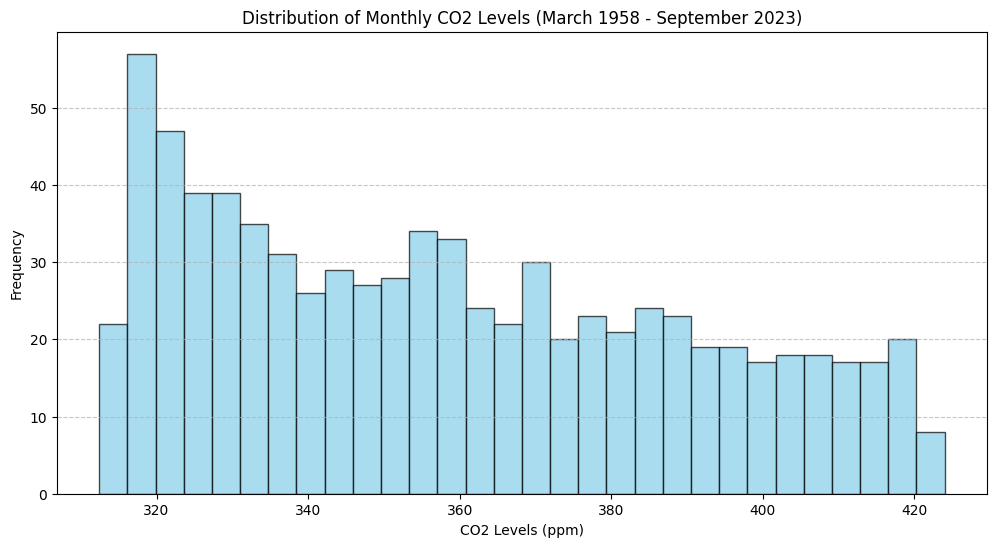

In [ ]:
# Menyiapkan figure
plt.figure(figsize=(12, 6))

# Membuat histogram
plt.hist(df["Monthly Average"], bins=30, edgecolor="k", color="skyblue", alpha=0.7)

# Menambahkan judul dan label
plt.title("Distribution of Monthly CO2 Levels (March 1958 - September 2023)")
plt.xlabel("CO2 Levels (ppm)")
plt.ylabel("Frequency")

# Menambahkan garis-garis grid sebagai referensi
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

Dari histogram yang dihasilkan, data tersebut memiliki:

- Positif Skew (Condong ke Kiri): Distribusi data CO2 Levels menunjukkan positif skew, yang berarti sebagian besar nilai CO2 berada di sisi yang lebih rendah dari rata-rata.
- Nilai Puncak: Puncak tertinggi histogram berada di kisaran 320 ppm (parts per million). Hal ini mengungkapkan bahwa nilai CO2 rata-rata yang paling umum selama periode pengamatan tertentu adalah sekitar 320 ppm. Ini adalah nilai yang sering muncul dalam dataset dan mencerminkan tingkat CO2 yang sering diamati dari bulan Maret 1958 hingga bulan September 2023.

### Boxplot

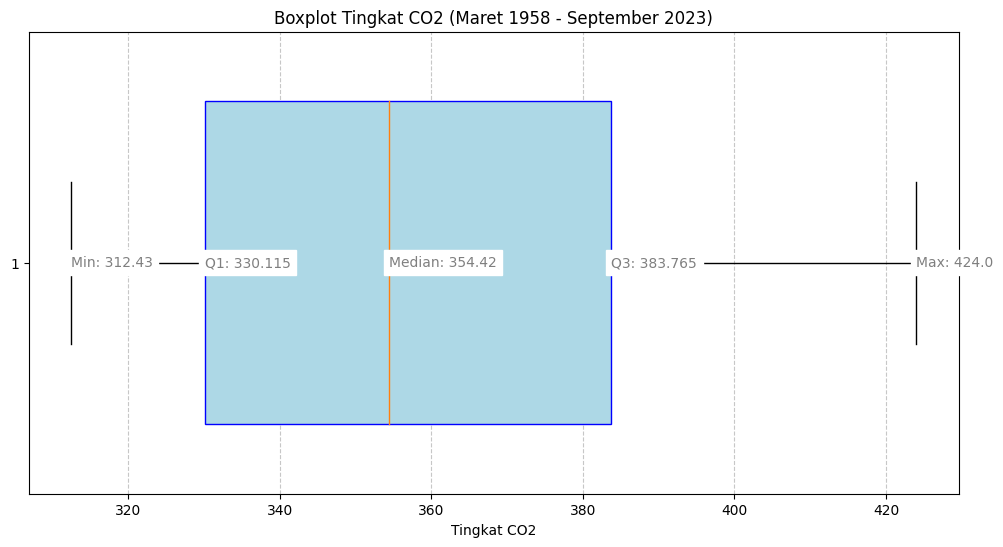

In [ ]:
# Membuat boxplot
plt.figure(figsize=(12, 6))
bp = plt.boxplot(df["Monthly Average"], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor="lightblue", color="blue"))
plt.title("Boxplot Tingkat CO2 (Maret 1958 - September 2023)")
plt.xlabel("Tingkat CO2")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menambahkan keterangan
min_val = np.min(df["Monthly Average"])
max_val = np.max(df["Monthly Average"])
median_val = np.median(df["Monthly Average"])
q1 = np.percentile(df["Monthly Average"], 25)
q3 = np.percentile(df["Monthly Average"], 75)

labels = [f"Min: {min_val}", f"Q1: {q1}", f"Median: {median_val}", f"Q3: {q3}", f"Max: {max_val}"]

# Menentukan posisi label
positions = [min_val, q1, median_val, q3, max_val]

for label, pos in zip(labels, positions):
    plt.text(pos, 1, label, fontsize=10, verticalalignment='center', backgroundcolor='white', alpha=0.5)

plt.show()

Dari boxplot yang dihasilkan, data CO2 Levels menunjukkan beberapa informasi:

- Sebaran Data: Boxplot menggambarkan sebaran data CO2 Levels dari bulan Maret 1958 hingga bulan September 2023. Rentang Interkuartil (IQR), yang mengukur sebaran data di antara kuartil pertama (Q1) dan kuartil ketiga (Q3), adalah sekitar 53.65 ppm, menunjukkan variasi yang cukup besar dalam data.
- Positif Skew (Condong ke Kiri): Median boxplot (garis tengah dalam kotak) berada di sekitar 354.42 ppm dan posisinya condong ke bagian sebelah kiri. Hal ini mengindikasikan bahwa sebagian besar pengukuran CO2 Levels cenderung berada di sisi yang lebih rendah dari rata-rata.

## Part 3: Exploratory Data Analysis with Python II - Bivariate Analysis
*Bivariate analysis* adalah tahap selanjutnya dalam eksplorasi data yang bertujuan untuk menyelidiki hubungan antara dua variabel atau lebih dalam dataset. Kami akan menggunakan metode ini untuk memahami bagaimana Tingkat CO2 (CO2 Levels) dalam dataset berkaitan dengan variabel Tahun (Year). Hal ini memungkinkan kita untuk mengidentifikasi pola, tren, dan ketergantungan yang mungkin ada di antara kedua variabel tersebut.

### Line Plot

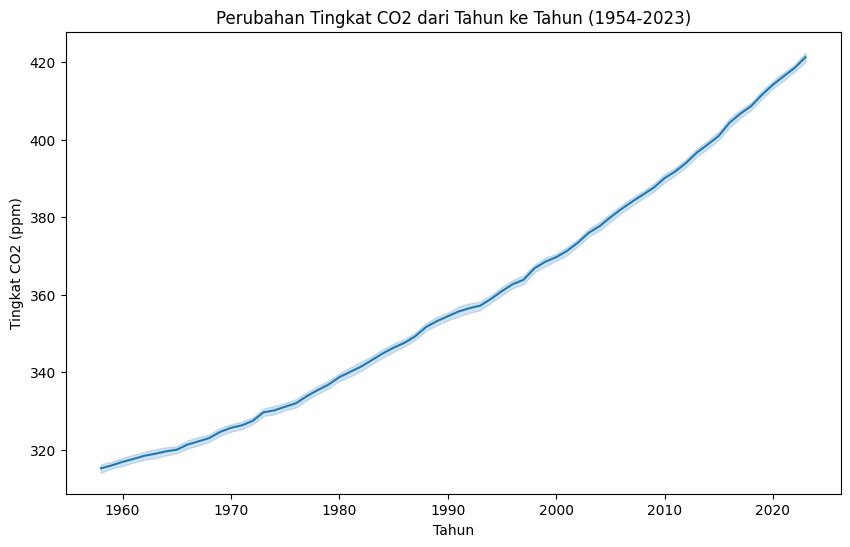

In [ ]:
# Membuat figure dengan ukuran 10x6 inci
plt.figure(figsize=(10, 6))

# Membuat line plot menggunakan Seaborn
sns.lineplot(x='Year', y='Monthly Average', data=df)

# Menambahkan judul plot
plt.title('Perubahan Tingkat CO2 dari Tahun ke Tahun (1954-2023)')

# Memberi label pada sumbu x
plt.xlabel('Tahun')

# Memberi label pada sumbu y
plt.ylabel('Tingkat CO2 (ppm)')

# Menampilkan plot ke layar
plt.show()

Dari Line Plot yang dihasilkan, kita dapat mengamati bahwa selama periode pengamatan (tahun 1958 hingga 2023), terdapat kecenderungan peningkatan yang konsisten dalam tingkat CO2 dari tahun ke tahun.

### Scatter Plot

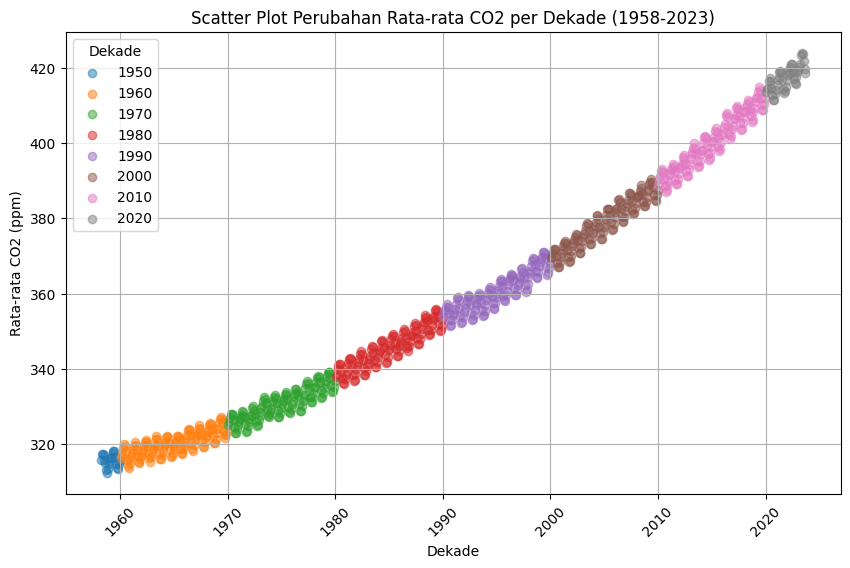

In [ ]:
# Menghitung dekade untuk setiap tanggal
df["Dekade"] = (df["Year"] // 10) * 10

# Membuat scatter plot dengan setiap dekade diwarnai secara berbeda
plt.figure(figsize=(10, 6))
for dekade, data in df.groupby("Dekade"):
    plt.scatter(data["Decimal Date"], data["Monthly Average"], alpha=0.5, label=dekade)

plt.title("Scatter Plot Perubahan Rata-rata CO2 per Dekade (1958-2023)")
plt.xlabel("Dekade")
plt.ylabel("Rata-rata CO2 (ppm)")
plt.xticks(rotation=45)
plt.legend(title="Dekade")
plt.grid(True)
plt.show()

Dari scatter plot yang dihasilkan, kita dapat memperoleh insight berikut:

- Peningkatan Konsisten: Scatter plot menunjukkan tren peningkatan yang konsisten dalam rata-rata CO2 sepanjang periode pengamatan. Titik-titik cenderung bergerak ke atas seiring berjalannya waktu, menunjukkan bahwa tingkat CO2 secara bertahap meningkat.

- Peningkatan Setiap Dekade: Peningkatan tingkat CO2 terjadi setiap dekade. Titik-titik yang mewakili tahun-tahun berdekade seringkali berada di atas titik-titik tahun-tahun sebelumnya, menunjukkan bahwa peningkatan tingkat CO2 terus berlangsung, bahkan dalam jangka waktu yang lebih luas.

## Part 4: Supervised Learning - Regression - Simple Linear Regression
Pada bagian ini, akan dilakukan analisis regresi sederhana untuk memahami bagaimana Tingkat CO2 berubah seiring berjalannya waktu (tahun). Analisis ini akan fokus pada hubungan antara dua variabel ini.

In [ ]:
# Memilih kolom Year dan Monthly Average dari CO2 Levels
X = df["Year"].values.reshape(-1, 1)
y = df["Monthly Average"].values

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Regresi Linear
model = LinearRegression()

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

In [ ]:
# Memperoleh koefisien persamaan regresi linear
slope = model.coef_[0]  # Koefisien kemiringan (slope)
intercept = model.intercept_  # Intercept

# Menampilkan persamaan regresi linear
print(f"Persamaan Regresi Linear: Tingkat CO2 = {slope:.4f} * Tahun + {intercept:.4f}")

# Menampilkan data dan garis regresi
fig = px.scatter(df, x="Year", y="Monthly Average", trendline="ols")
fig.update_traces(marker=dict(size=5), line=dict(width=2, color='red'), name="Data Aktual")
fig.update_layout(
    xaxis_title="Tahun",
    yaxis_title="Tingkat CO2",
    title="Simple Linear Regression: Tingkat CO2 Seiring Waktu (1958-2023)"
)

# Menampilkan grafik
fig.update_traces(showlegend=True)
fig.show()

Persamaan Regresi Linear: Tingkat CO2 = 1.6216 * Tahun + -2869.2896


In [ ]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan evaluasi model
print("Mean Squared Error:", mse)
print("Nilai R-squared:", r2)

Mean Squared Error: 23.02446742390749
Nilai R-squared: 0.9781883712225856


In [ ]:
tahun_yang_akan_diprediksi = 2045
co2_terprediksi = model.predict(np.array([[tahun_yang_akan_diprediksi]]))
print(f"Prediksi tingkat CO2 pada tahun {tahun_yang_akan_diprediksi}: {co2_terprediksi[0]}")

Prediksi tingkat CO2 pada tahun 2045: 446.8352169429086


Dalam analisis regresi linear sederhana yang telah dilakukan, berikut adalah insight yuang diperoleh:
1. Hasil regresi linear dapat memberikan gambaran tentang  tren perubahan Tingkat CO2 seiring berjalannya waktu (tahun) yang cenderung meningkat dari tahun ke tahun.
2. MSE sebesar 23.02446742390749 mencerminkan sejauh mana kesalahan prediksi model terhadap data pengujian. Nilai MSE ini relatif rendah, yang menandakan bahwa model regresi linear memiliki kinerja yang baik dalam memprediksi Tingkat CO2.
3. NR-squared sebesar 0.9781883712225856 menggambarkan sejauh mana model regresi linear mampu menjelaskan variasi dalam Tingkat CO2. Dengan R-squared yang tinggi, model ini sesuai dengan data dan efektif dalam menjelaskan variasi dalam Tingkat CO2. Lebih dari 97.8% dari variasi Tingkat CO2 dapat dijelaskan oleh model ini.
4. Model memperkirakan bahwa Tingkat CO2 pada tahun 2045 akan mencapai nilai sekitar 446.8352169429086 berdasarkan tren yang diidentifikasi dalam data.

## Part 5: Unsupervised Learning - K-Means Clustering
Bagian ini berfokus pada penerapan K-Means Clustering untuk mengkategorikan tahun-tahun dalam dataset ke dalam profil iklim yang berbeda berdasarkan beberapa variabel terkait iklim.

In [ ]:
# Memilih variabel yang akan digunakan untuk clustering
climate_data = df[["Year", "Monthly Average", "De-seasonalized"]]

# Standarisasi
scaler = StandardScaler()
X = scaler.fit_transform(climate_data)

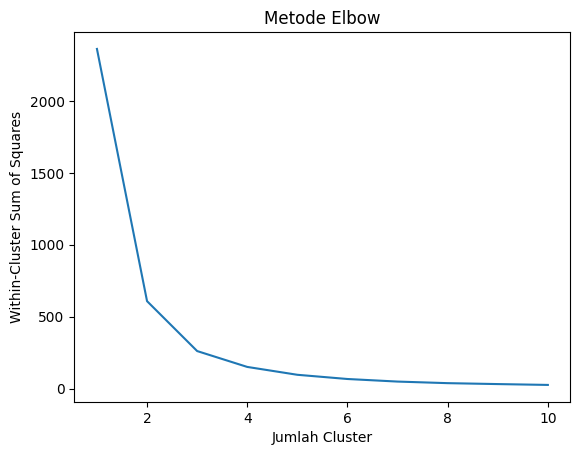

In [ ]:
# Menggunakan metode Elbow untuk memilih jumlah cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot elbow method untuk memilih jumlah cluster
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [ ]:
# Berdasarkan plot elbow, jumlah cluster yang dipilih adalah 3.
# Menerapkan K-Means clustering dengan jumlah cluster yang dipilih
n_clusters=3
kmeans = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [ ]:
# Menambahkan kolom cluster ke DataFrame awal
df["Cluster"] = kmeans.labels_

# Menampilkan hasil clustering
print(df)

     Year  Month  Decimal Date  Monthly Average  De-seasonalized  #days  \
0    1958      3     1958.2027           315.70           314.43     -1   
1    1958      4     1958.2877           317.45           315.16     -1   
2    1958      5     1958.3699           317.51           314.71     -1   
3    1958      6     1958.4548           317.24           315.14     -1   
4    1958      7     1958.5370           315.86           315.18     -1   
..    ...    ...           ...              ...              ...    ...   
782  2023      5     2023.3750           424.00           420.56     31   
783  2023      6     2023.4583           423.68           421.22     29   
784  2023      7     2023.5417           421.83           421.42     21   
785  2023      8     2023.6250           419.68           421.55     21   
786  2023      9     2023.7083           418.51           422.02     18   

     St. Dev of Days  Unc. of Mon Mean  Dekade  Cluster  
0              -9.99             -0.99   

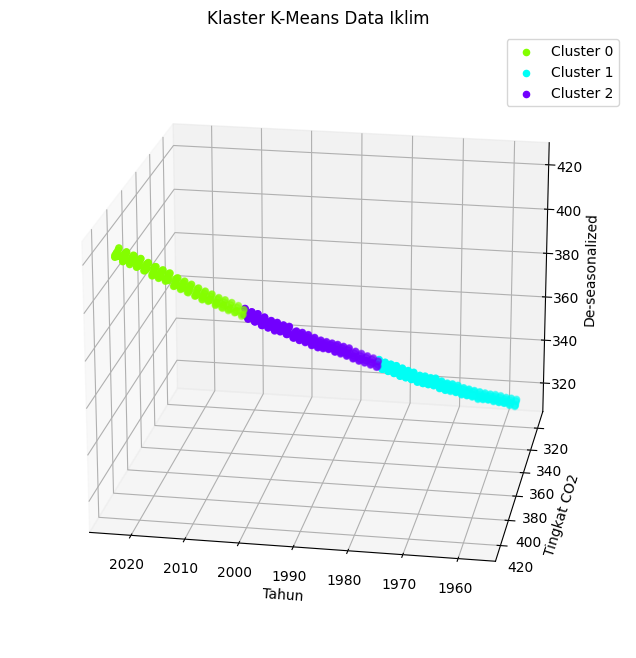

In [ ]:
# Visualisasi hasil klaster dalam tiga dimensi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna klaster sesuai dengan label klaster
palette = sns.color_palette("hsv", n_clusters)
for cluster in range(n_clusters):
    cluster_data = df[df["Cluster"] == cluster]
    ax.scatter(cluster_data["Year"], cluster_data["Monthly Average"], cluster_data["De-seasonalized"], c=[palette[cluster]], label=f"Cluster {cluster}")

ax.set_xlabel("Tahun")
ax.set_ylabel("Tingkat CO2")
ax.set_zlabel("De-seasonalized")

# Menyesuaikan orientasi visualisasi
ax.azim = 100
ax.elev = 20

plt.title("Klaster K-Means Data Iklim")
plt.legend()
plt.show()

In [ ]:
# Menghitung rentang (minimum dan maksimum) dari setiap klaster untuk variabel "Monthly Average" dan "De-seasonalized"
cluster_ranges = df.groupby("Cluster")[["Monthly Average", "De-seasonalized"]].agg(["min", "max", "mean"])

# Tampilkan hasil rentang untuk setiap klaster
print(cluster_ranges)

# Transformasi balik data standarisasi ke data asli
cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)

        Monthly Average                     De-seasonalized          \
                    min     max        mean             min     max   
Cluster                                                               
0                378.54  424.00  399.698559          379.10  422.02   
1                312.43  344.77  326.738837          314.43  343.86   
2                341.59  380.80  359.971439          341.85  380.49   

                     
               mean  
Cluster              
0        399.641937  
1        326.760897  
2        359.969962  


Insight yang dapat diambil dari analisis klaster (clustering) pada Part 5 adalah sebagai berikut:
1. Data tahun-tahun yang mencakup variabel CO2 dan De-seasonalized telah dikelompokkan ke dalam beberapa klaster berdasarkan karakteristik iklimnya.
2. Terdapat perbedaan dalam karakteristik antara klaster-klasternya. Setiap klaster memiliki rentang nilai yang berbeda untuk variabel "Monthly Average" dan "De-seasonalized".
  - Cluster 0: Berisikan data-data yang memiliki tingkat CO2 yang lebih tinggi dan De-seasonalized yang juga lebih tinggi dibandingkan dengan cluster lainnya.
  - Cluster 1: Berisikan data-data yang memiliki tingkat CO2 yang lebih rendah dan De-seasonalized yang juga lebih rendah dibandingkan dengan cluster lainnya.
  - Cluster 2: Berisikan data-data yang memiliki tingkat CO2 dan De-seasonalized di antara kedua klaster lainnya.
  
